In [1]:
import pandas as pd
import numpy as np
import logging
logging.basicConfig(
	level=logging.ERROR
)

/Users/nazarlenisin/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Load Data

In [2]:
from NLP.Lab4.data_ingation import CSVDataIngation

# initialize data loader
data_loader = CSVDataIngation()

# load data
data = data_loader.load('/Users/nazarlenisin/Desktop/NLP_CV_UNIVERSITY/NLP/Lab4/data/data.csv')
data.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


# Engineer Target

In [3]:
data['Sentiment'] = data['Sentiment'].apply(lambda sentiment: int(sentiment == 'positive'))
data.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,1
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",0
2,"For the last quarter of 2010 , Componenta 's n...",1
3,According to the Finnish-Russian Chamber of Co...,0
4,The Swedish buyout firm has sold its remaining...,0


# Separate feature and target

In [4]:
from sklearn.model_selection import train_test_split

X = data['Sentence']
y = data['Sentiment']

# Split data for train and test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=36)
X_train, X_test, y_train, y_test = X_train.tolist(), X_test.tolist(), y_train.tolist(), y_test.tolist()


# Find Optimal hyperparameters for Sentiment Model

In [6]:
from sklearn.naive_bayes import BernoulliNB
from NLP.Lab4.model.model_trainer import SentimentModelOptuneTunner

naive_bayes_model_hyperparams = {
    'text_embedding_params': {'dim': ('int', (10, 200)), 
                              'window':  ('int', (2,3))},
    'estimator_params': {'alpha': ('float', (1e-3, 1.0)), 
                         'binarize': ('float', (0.0, 10.0)), 
                         'fit_prior': ('categorical', [True, False])},
    }

naive_bayse_optimizer = SentimentModelOptuneTunner(X_train,
                                                   y_train,
                                                   X_test,
                                                   y_test,
                                                   naive_bayes_model_hyperparams,
                                                   funcs={'estimator': BernoulliNB})
naive_bayse_optimizer.optimize(n_trials=5)
naive_bayse_optimizer.best_params, naive_bayse_optimizer.best_score

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nazarlenisin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[I 2025-03-09 23:43:24,899] A new study created in memory with name: no-name-b4e41c4b-a1b8-4b38-9161-01575098ba5a
[I 2025-03-09 23:43:30,548] Trial 3 finished with value: 0.6754135767256132 and parameters: {'dim': 110, 'window': 2, 'alpha': 0.7662749971062367, 'binarize': 7.898470537948975, 'fit_prior': True}. Best is trial 3 with value: 0.6754135767256132.
[I 2025-03-09 23:43:30,614] Trial 2 finished with value: 0.5419281232173417 and parameters: {'dim': 75, 'window': 3, 'alpha': 0.11266132581460919, 'binarize': 5.992411918949429, 'fit_prior': False}. Best is trial 3 with value: 0.6754135767256132.
[I 2025-03-09 23:43:32,476] Trial 1 finished with value: 0.6195094124358242 and parameters: {'dim': 173, 'window': 2, 'alpha': 0.08767802872008386, 'binarize': 0.058366363538170374, 'fit_prior': False}. Best is trial 3 with value: 0.6754135767256132.
[

({'dim': 110,
  'window': 2,
  'alpha': 0.7662749971062367,
  'binarize': 7.898470537948975,
  'fit_prior': True},
 0.6754135767256132)

In [7]:
logistic_regression_model_hyperparams = {
    'text_embedding_params': {'dim': ('int', (10, 200)), 
                              'window':  ('int', (2,3))},
    'estimator_params': {'penalty': ('categorical', ["none", "l2"])}
                     }
logistic_regression_optimizer = SentimentModelOptuneTunner(X_train, 
                                                           y_train, 
                                                           X_test, 
                                                           y_test, 
                                                           logistic_regression_model_hyperparams)
logistic_regression_optimizer.optimize(n_trials=5)
logistic_regression_optimizer.best_params, logistic_regression_optimizer.best_score

[I 2025-03-09 23:43:32,794] A new study created in memory with name: no-name-35557297-415c-4795-935a-82943e8f5806
/Users/nazarlenisin/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/nazarlenisin/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/nazarlenisin/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/nazarlenisin/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to co

({'dim': 166, 'window': 2, 'penalty': 'none'}, 0.6936679977181974)

# Initialize Sentiment model with best hyperparameters

In [8]:
from NLP.Lab4.model.model_builder import SentimentModel

naive_bayes_model = SentimentModel(estimator=BernoulliNB, 
                                   text_embedding_params={'dim': 153, 'window': 2},
                                   estimator_params={'alpha': 0.7001567120116521,
                                                     'binarize': 6.91071226059615,
                                                     'fit_prior': True})
naive_bayes_model.fit(X_train, y_train)


logistic_regression_model = SentimentModel(text_embedding_params={'dim': 42, 'window': 2}, 
                                           estimator_params={'penalty': 'none'})
logistic_regression_model.fit(X_train, y_train)

Sentiment model:
Pipeline: Pipeline(steps=[('text_cleaning',
                 TextCleaningPipelineAdapter(func=SimpleTextCleaner())),
                ('text_tokenization',
                 TextTokenizerPipelineAdapter(func=NLTKTextTokenier(tokenizer=<function word_tokenize at 0x7fc8cf711cf0>))),
                ('text_embedding',
                 TextEmbeddingPipelineAdapter(func=Word2VecEmbedding(model=<class 'gensim.models.word2vec.Word2Vec'>))),
                ('estimator', LogisticRegression(penalty='none'))])


/Users/nazarlenisin/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/nazarlenisin/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Evaulate Models

In [9]:
from NLP.Lab4.model.model_evaluation import SimpleModelEvaluation

model_evaluation = SimpleModelEvaluation()

Model to Evaluate: Sentiment model:
Pipeline: Pipeline(steps=[('text_cleaning',
                 TextCleaningPipelineAdapter(func=SimpleTextCleaner())),
                ('text_tokenization',
                 TextTokenizerPipelineAdapter(func=NLTKTextTokenier(tokenizer=<function word_tokenize at 0x7fc8cf711cf0>))),
                ('text_embedding',
                 TextEmbeddingPipelineAdapter(func=Word2VecEmbedding(model=<class 'gensim.models.word2vec.Word2Vec'>))),
                ('estimator',
                 BernoulliNB(alpha=0.7001567120116521,
                             binarize=6.91071226059615))])

Classification report:
              precision    recall  f1-score   support

           0       0.69      0.93      0.79      1210
           1       0.34      0.08      0.13       543

    accuracy                           0.67      1753
   macro avg       0.52      0.51      0.46      1753
weighted avg       0.58      0.67      0.59      1753



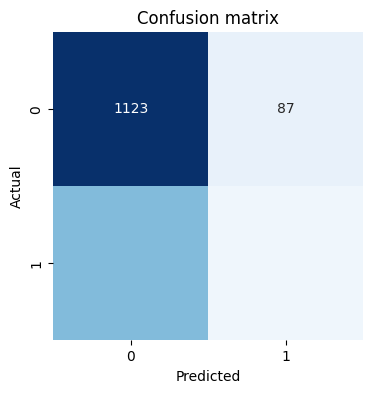

In [10]:
model_evaluation.evaluate(naive_bayes_model, X_test, y_test)

Model to Evaluate: Sentiment model:
Pipeline: Pipeline(steps=[('text_cleaning',
                 TextCleaningPipelineAdapter(func=SimpleTextCleaner())),
                ('text_tokenization',
                 TextTokenizerPipelineAdapter(func=NLTKTextTokenier(tokenizer=<function word_tokenize at 0x7fc8cf711cf0>))),
                ('text_embedding',
                 TextEmbeddingPipelineAdapter(func=Word2VecEmbedding(model=<class 'gensim.models.word2vec.Word2Vec'>))),
                ('estimator', LogisticRegression(penalty='none'))])

Classification report:
              precision    recall  f1-score   support

           0       0.71      0.93      0.81      1210
           1       0.50      0.16      0.25       543

    accuracy                           0.69      1753
   macro avg       0.61      0.55      0.53      1753
weighted avg       0.65      0.69      0.63      1753



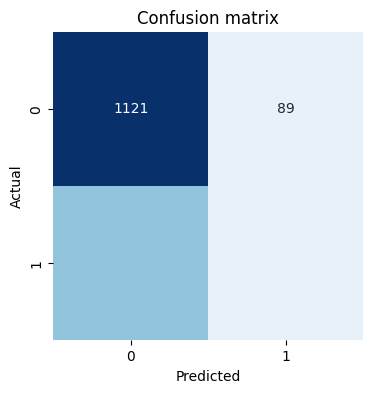

In [11]:
model_evaluation.evaluate(logistic_regression_model, X_test, y_test)

# Example Prediction

In [12]:
dummy_text = 'Hello what is you name????'
print('Text:', dummy_text, '| Sentiment:', naive_bayes_model.predict([dummy_text])[0])
print('Text:', dummy_text, '| Sentiment:', logistic_regression_model.predict([dummy_text])[0])

Text: Hello what is you name???? | Sentiment: 0
Text: Hello what is you name???? | Sentiment: 0
